In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from scikeras.wrappers import KerasClassifier

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2



In [3]:
data = pd.read_csv('bank_loan_data.csv')

print(data.head())

data.info()

print(data.isnull().sum())


   ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total

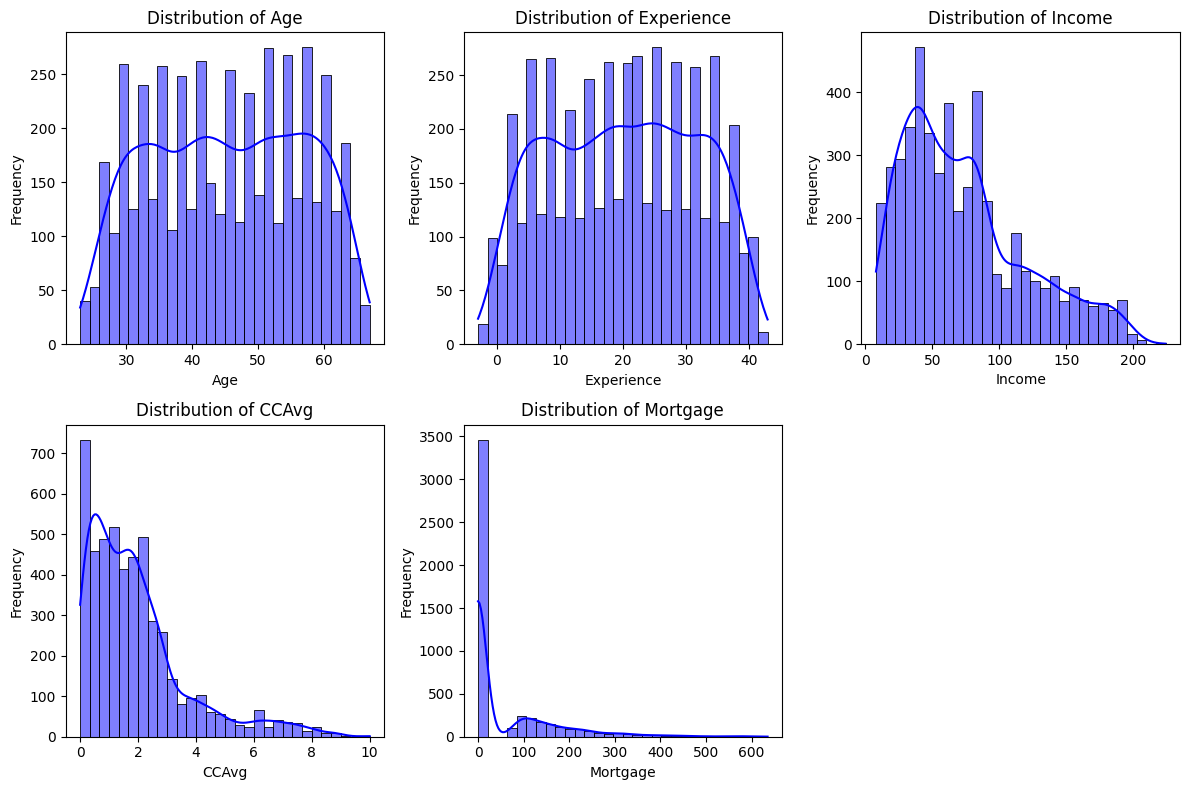

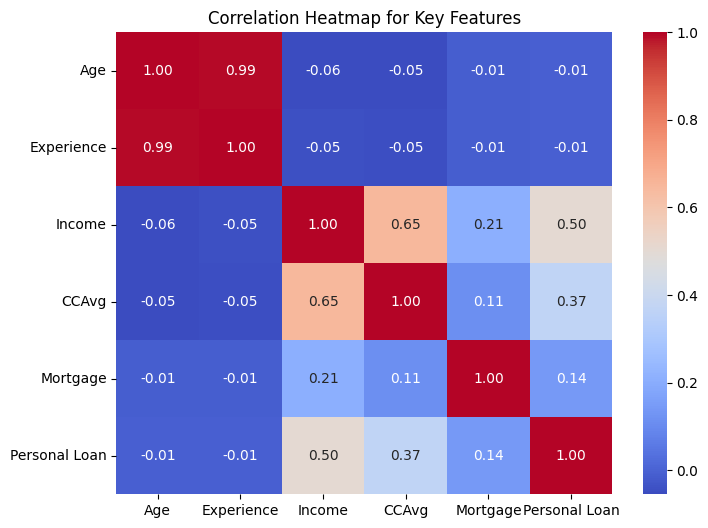

In [4]:
relevant_features = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']

plt.figure(figsize=(12, 8))
for i, feature in enumerate(relevant_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[feature], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

key_features = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage', 'Personal Loan']

plt.figure(figsize=(8, 6))
sns.heatmap(data[key_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap for Key Features")
plt.show()



In [5]:
#drops irrelevant columns
data = data.drop(columns=['ID', 'ZIP Code'])

#splits into features and target
X = data.drop(columns=['Personal Loan'])
y = data['Personal Loan']

#scales the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



In [6]:
#defines the neural network
model = Sequential([
    Input(shape=(X_train.shape[1],)), 
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  
])

#compiles the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6824 - loss: 1.1621 - val_accuracy: 0.9038 - val_loss: 0.6608 - learning_rate: 0.0010
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step - accuracy: 0.9163 - loss: 0.6240 - val_accuracy: 0.9425 - val_loss: 0.4241 - learning_rate: 0.0010
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step - accuracy: 0.9418 - loss: 0.4226 - val_accuracy: 0.9563 - val_loss: 0.3090 - learning_rate: 0.0010
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step - accuracy: 0.9412 - loss: 0.3278 - val_accuracy: 0.9600 - val_loss: 0.2468 - learning_rate: 0.0010
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 731us/step - accuracy: 0.9489 - loss: 0.2649 - val_accuracy: 0.9688 - val_loss: 0.2063 - learning_rate: 0.0010
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step - accuracy: 0.9553 - loss: 0.2182 - val_accuracy: 0.9700 - val_loss: 0.1835 - learning_rate: 0.0010
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 728us/step - accuracy: 0.9631 - los

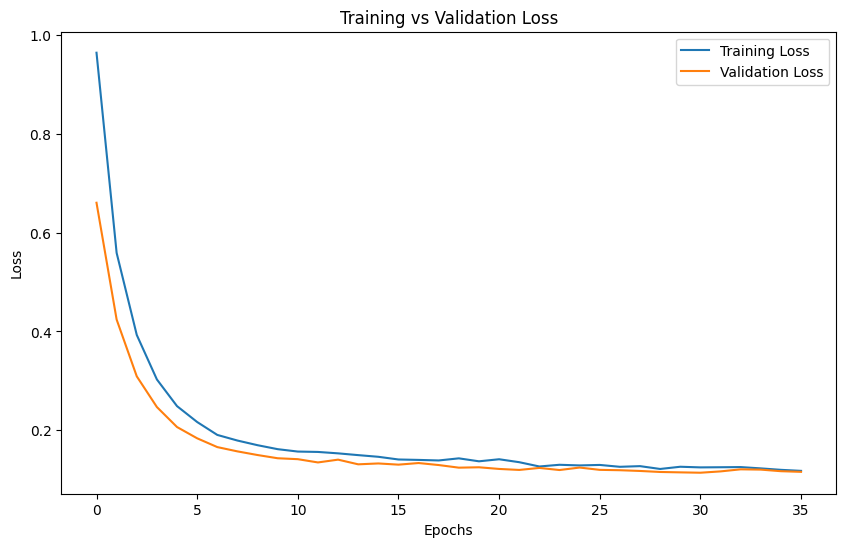

In [7]:
#early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=0.00001)

history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=50,
                    batch_size=32,
                    callbacks=[early_stopping, reduce_lr])

#plots training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step - accuracy: 0.9837 - loss: 0.0981
Test Accuracy: 0.98
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step


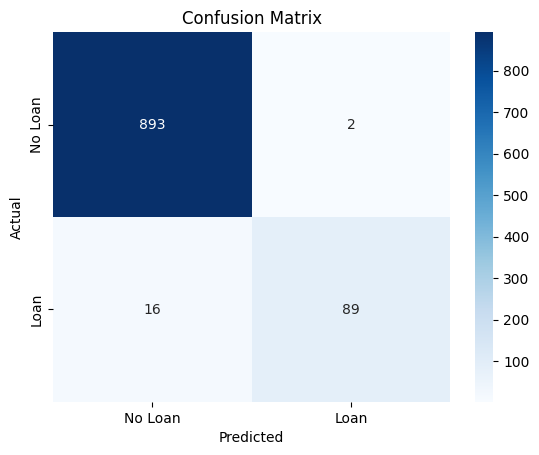

              precision    recall  f1-score   support

     No Loan       0.98      1.00      0.99       895
        Loan       0.98      0.85      0.91       105

    accuracy                           0.98      1000
   macro avg       0.98      0.92      0.95      1000
weighted avg       0.98      0.98      0.98      1000



In [8]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

#confusion matrix
y_pred = (model.predict(X_test) > 0.5).astype("int32")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Loan', 'Loan'], yticklabels=['No Loan', 'Loan'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(classification_report(y_test, y_pred, target_names=['No Loan', 'Loan']))



32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step


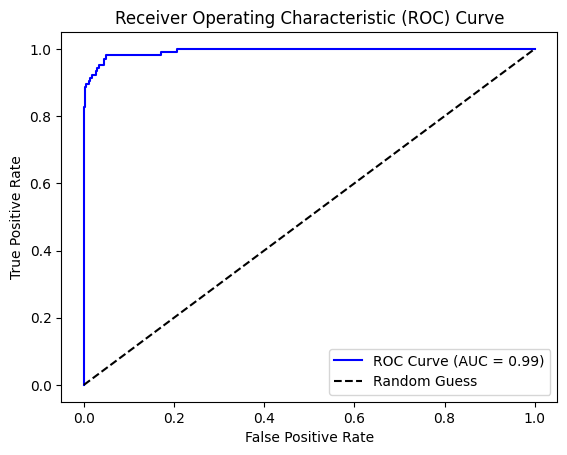

In [9]:
#generates probabilities and calculate ROC curve
y_probs = model.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = auc(fpr, tpr)

#plots ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [10]:
#defines a wrapper function for scikeras
def create_model():
    model = Sequential([
        Input(shape=(X_train.shape[1],)),  # Explicitly define input shape
        Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
        Dropout(0.3),
        Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
        Dropout(0.3),
        Dense(1, activation='sigmoid')  # Output layer
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

#wraps the Keras model using scikeras
wrapped_model = KerasClassifier(model=create_model, epochs=50, batch_size=32, verbose=0)

#cross-validation
scores = cross_val_score(wrapped_model, X_scaled, y, cv=5)
print(f"Cross-Validation Accuracy: {scores.mean():.2f} ± {scores.std():.2f}")


Cross-Validation Accuracy: 0.98 ± 0.00


In [11]:
report = classification_report(y_test, y_pred, target_names=['No Loan', 'Loan'], output_dict=True)

precision = report['Loan']['precision']
recall = report['Loan']['recall']
f1_score = report['Loan']['f1-score']

print("\nModel Summary:")
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")




Model Summary:
Test Accuracy: 0.98
Precision: 0.98
Recall: 0.85
F1 Score: 0.91
